In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("glass.csv")

In [30]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB
None


In [32]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [33]:
print(df.isnull().sum())  # Checking missing values

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [34]:
print(df["Type"].value_counts())  # Class distribution

Type
2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: count, dtype: int64


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

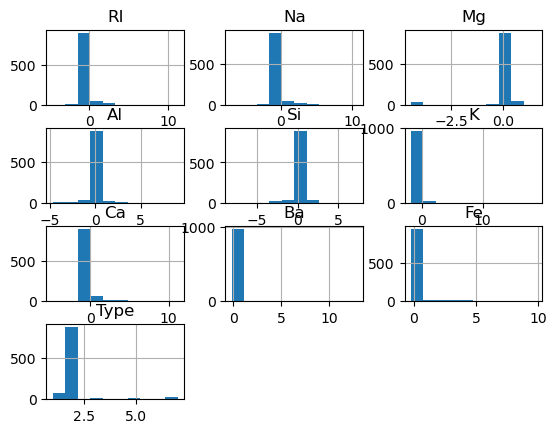

In [53]:
df.hist()

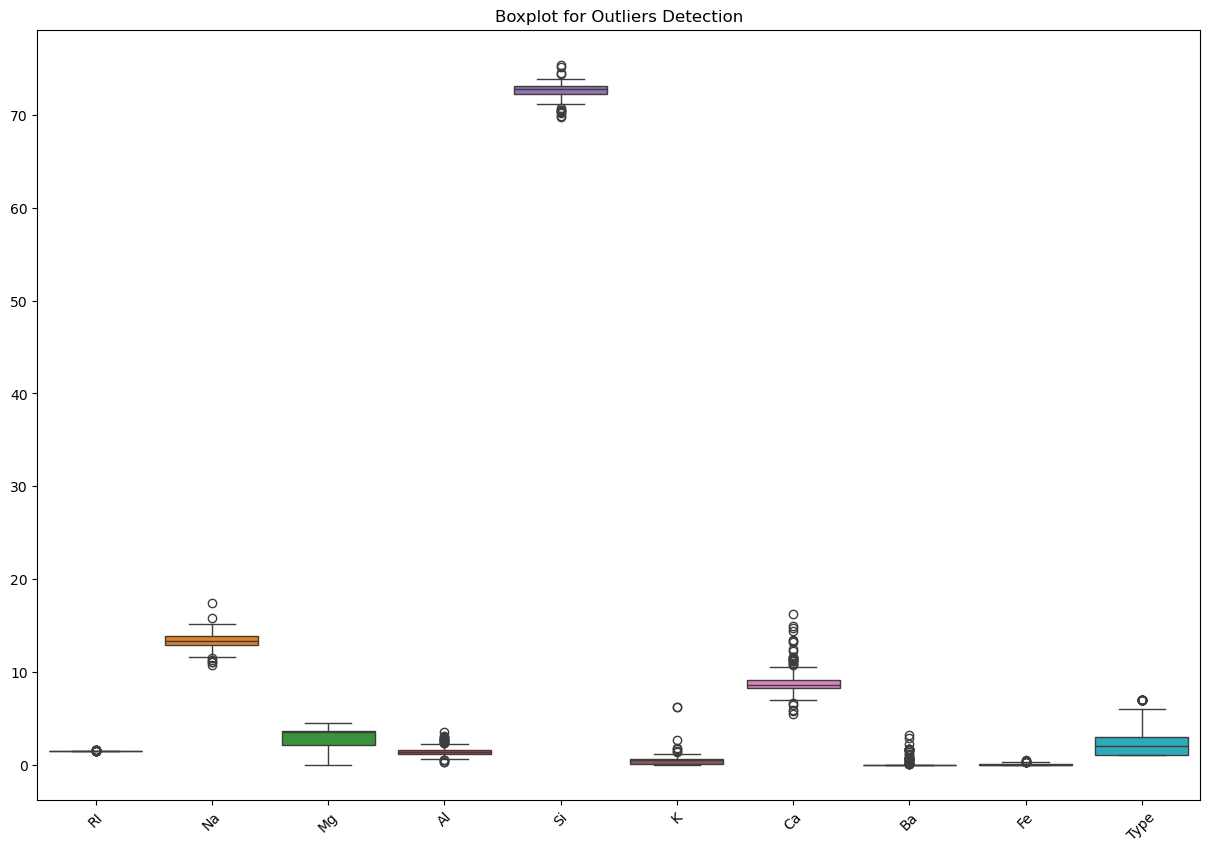

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title("Boxplot for Outliers Detection")
plt.xticks(rotation=45)
plt.show()

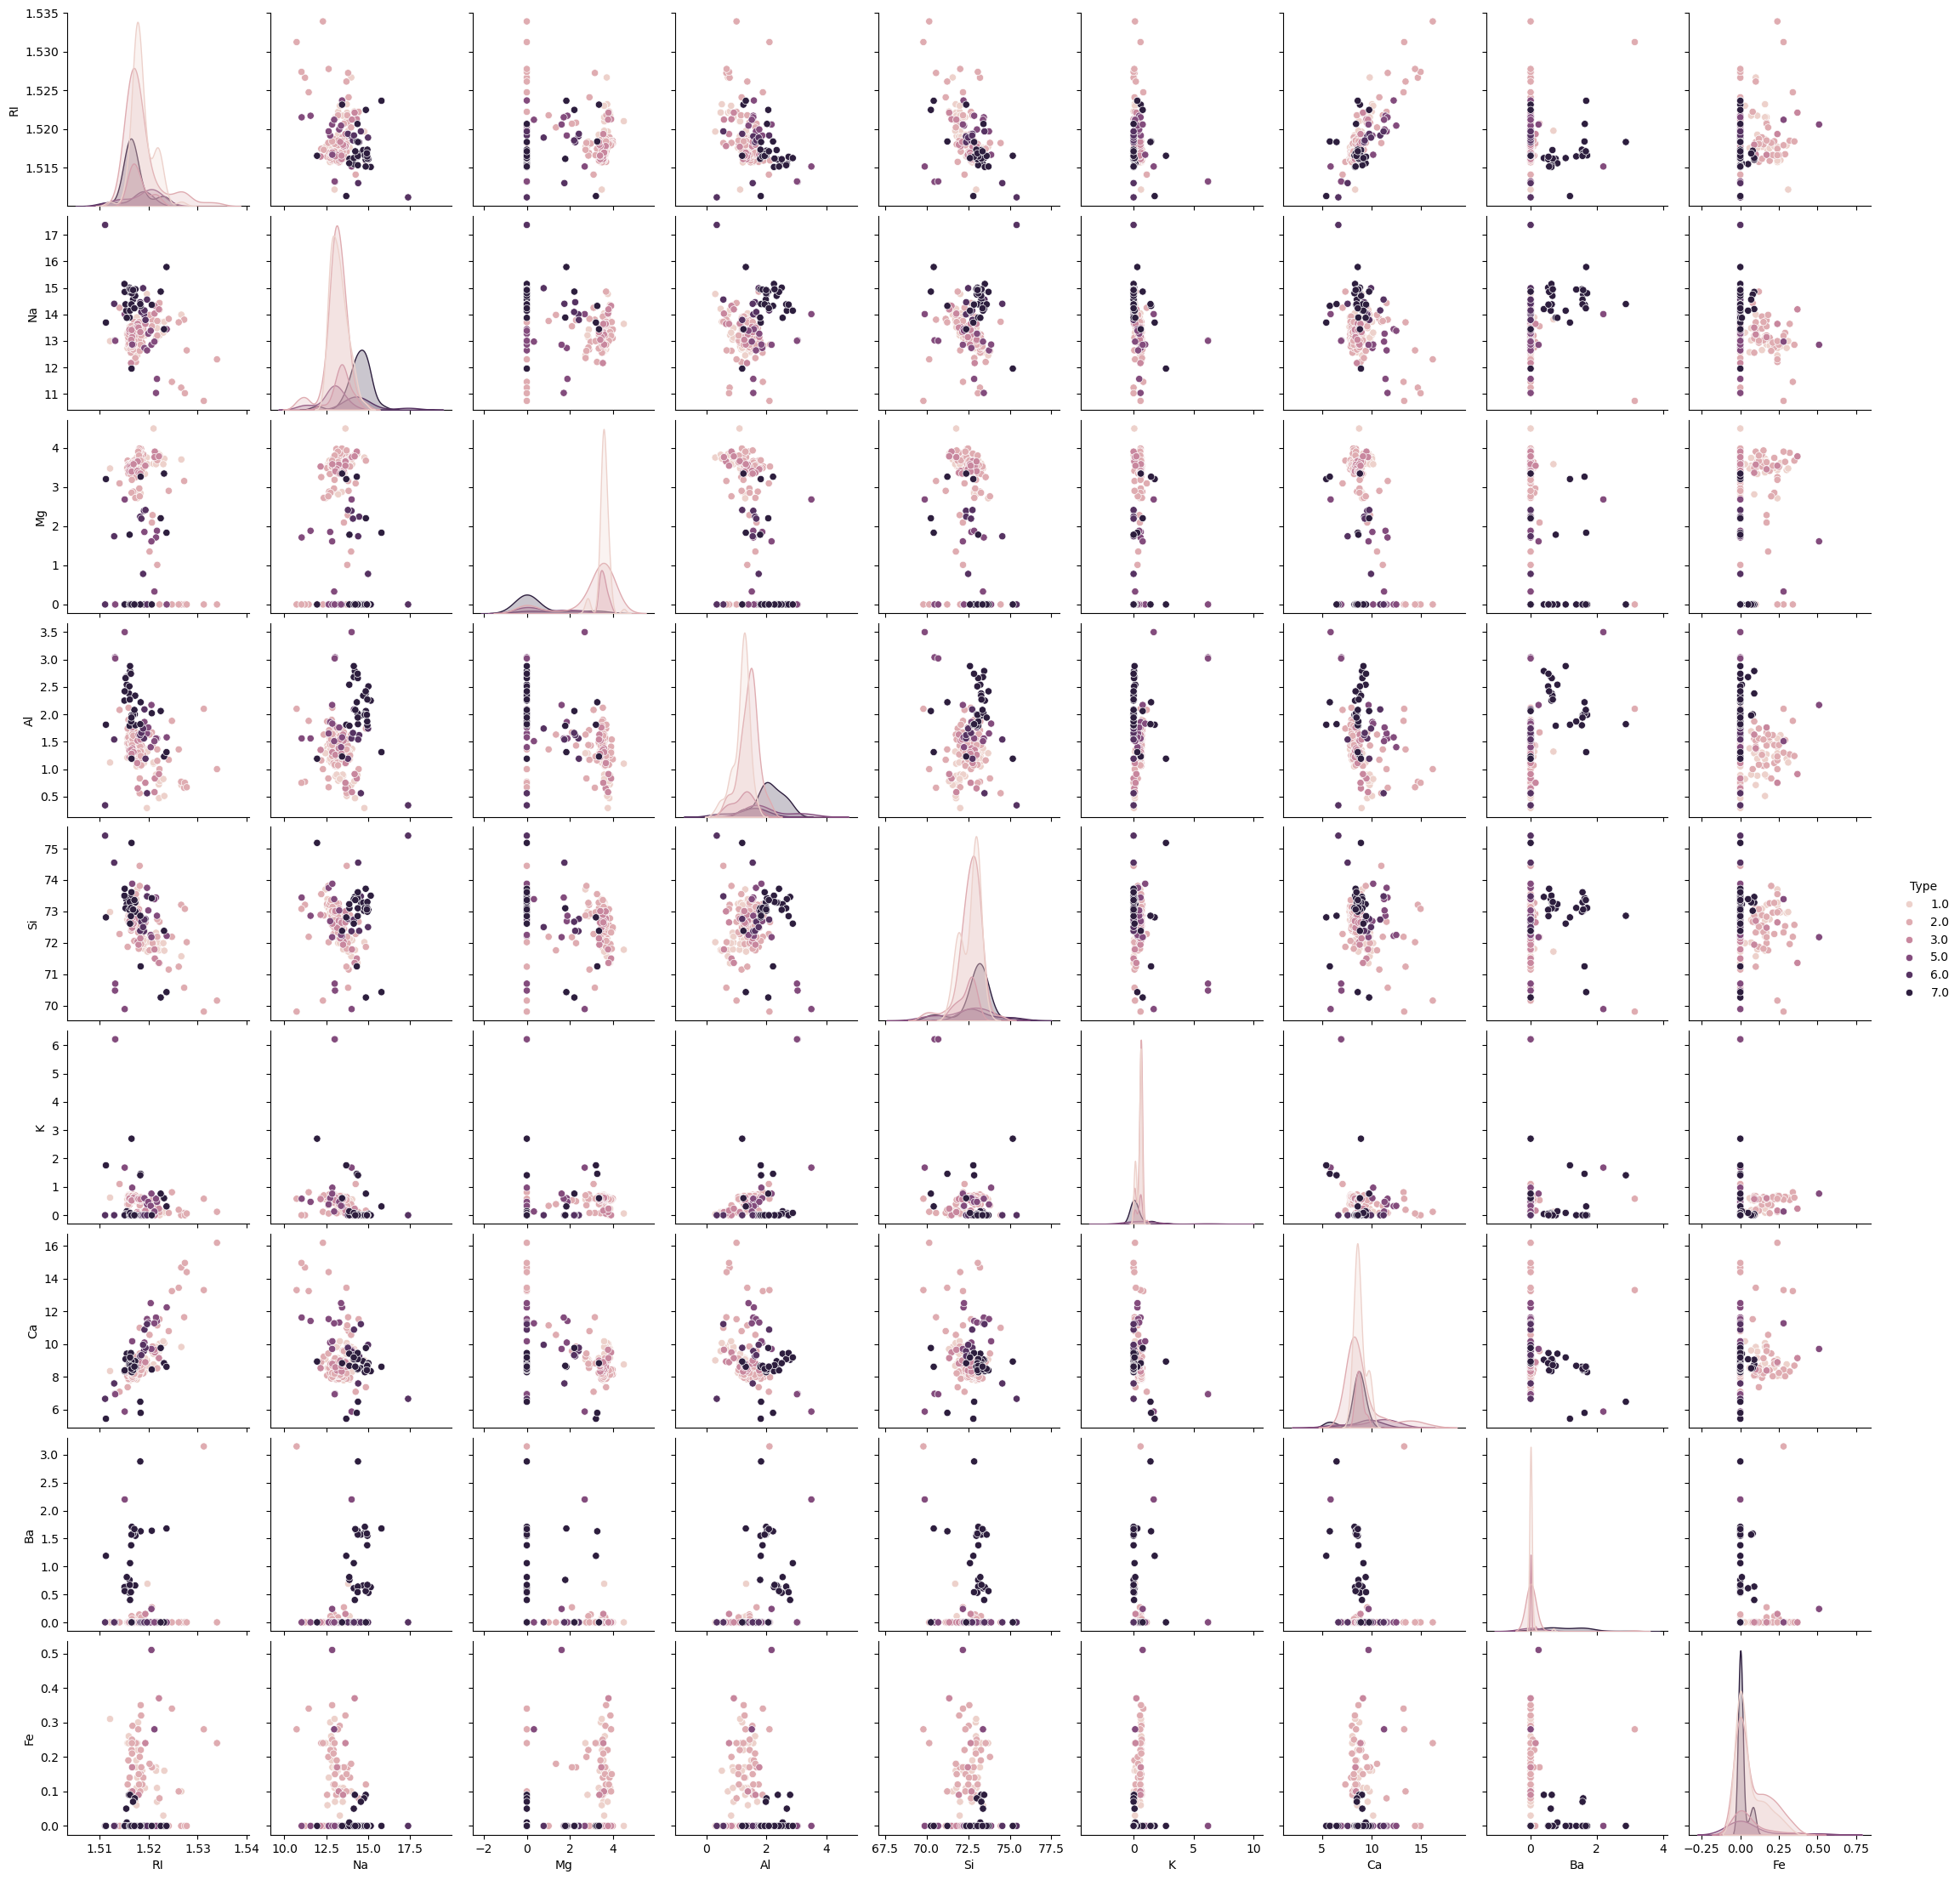

In [37]:
sns.pairplot(df, hue="Type")
plt.show()

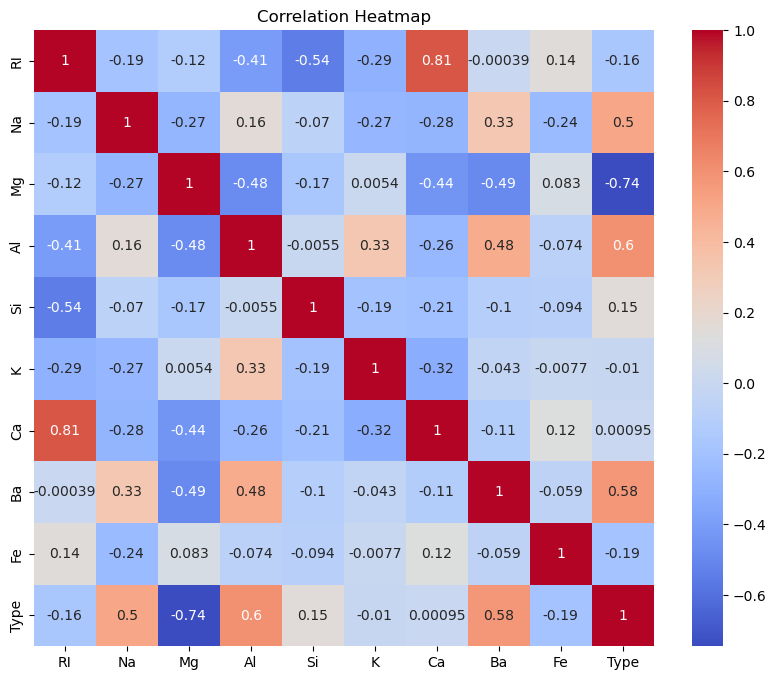

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
# Handling missing values (if any)
df.fillna(df.median(), inplace=True)

In [40]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [41]:
X = df.iloc[:, :-1]
y = df["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [45]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.79      0.76        14
         2.0       0.97      0.98      0.98       172
         3.0       0.00      0.00      0.00         3
         5.0       0.67      0.67      0.67         3
         6.0       1.00      1.00      1.00         2
         7.0       0.83      0.83      0.83         6

    accuracy                           0.94       200
   macro avg       0.70      0.71      0.71       200
weighted avg       0.93      0.94      0.94       200

Confusion Matrix:
[[ 11   3   0   0   0   0]
 [  2 169   0   1   0   0]
 [  2   1   0   0   0   0]
 [  0   0   0   2   0   1]
 [  0   0   0   0   2   0]
 [  0   1   0   0   0   5]]
Accuracy: 0.945


In [49]:
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy: 0.94


In [50]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.89


In [51]:
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.93


In [52]:
print("\nModel Performance Comparison:")
print(f"Random Forest: {accuracy_score(y_test, y_pred):.4f}")
print(f"Bagging: {accuracy_score(y_test, y_pred_bagging):.4f}")
print(f"AdaBoost: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"Gradient Boosting: {accuracy_score(y_test, y_pred_gb):.4f}")



Model Performance Comparison:
Random Forest: 0.9450
Bagging: 0.9400
AdaBoost: 0.8900
Gradient Boosting: 0.9300
